## Data Visualization III <br>
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g., https://archive.ics.uci.edu/ml/datasets/Iris). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a box plot for each feature in the dataset.
4. Compare distributions and identify outliers.

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

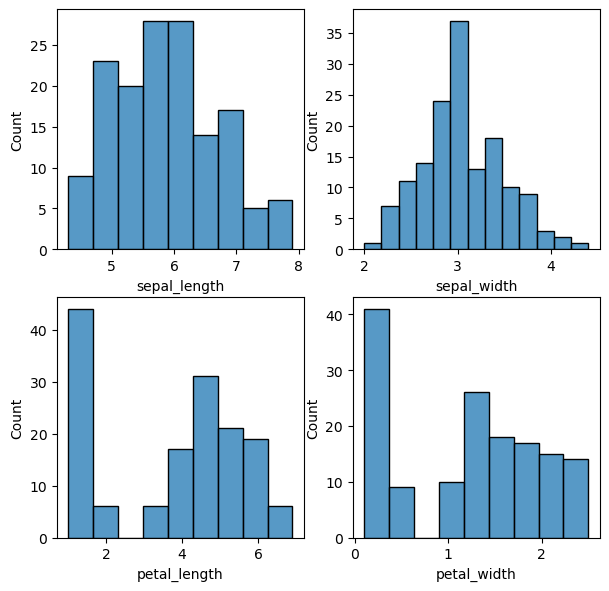

In [12]:
x = 1
plt.figure(figsize=(7,7),dpi=100)

for i in df.columns:
    if df[i].dtypes != 'object':
        plt.subplot(2,2,x)
        sns.histplot(df[i])
        plt.show
        x+=1

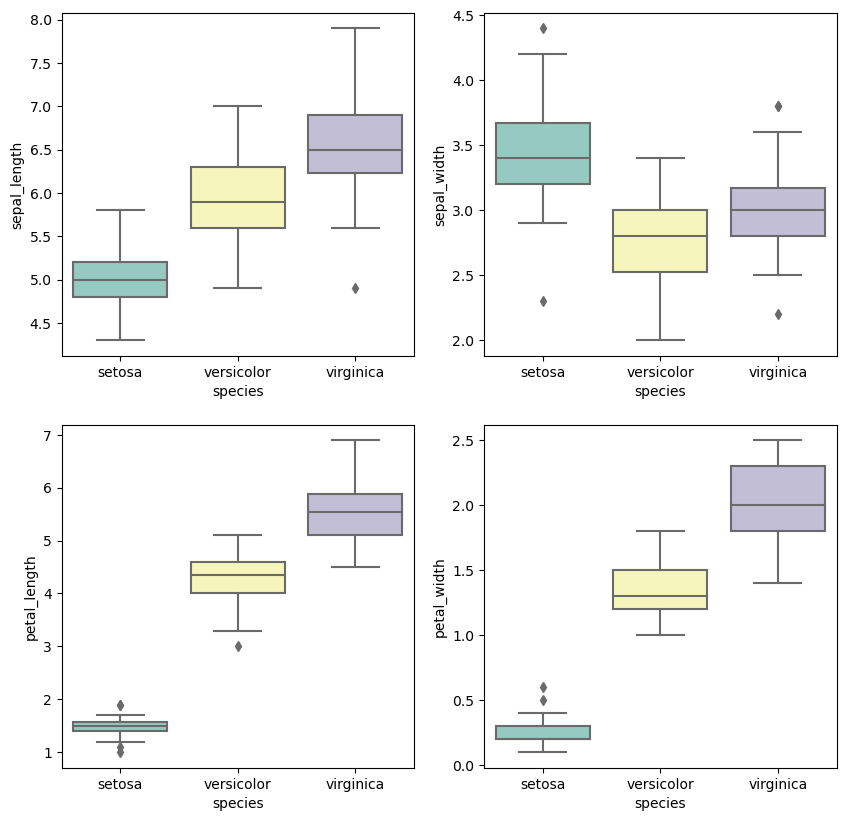

In [14]:
x = 1
plt.figure(figsize=(10,10),dpi=100)

for i in df.columns:
    if df[i].dtypes !='object':
        plt.subplot(2,2,x)
        sns.boxplot(data=df,x='species',y=i,palette='Set3')
        
        x+=1

In [22]:
def remove_outliers(df,x):
    outliers = []
    for col in x:
        q1 = np.percentile(df[col],25)
        q3 = np.percentile(df[col],75)
        
        iqr = q3-q1
        lo = q1-1.5*iqr
        hi = q3+1.5*iqr
    
        out = list(set(df[(df[col] < lo) | (df[col] > hi)].index))
        
        outliers += out
    return outliers


while True:
    outliers = remove_outliers(df,df.select_dtypes(include=np.number).columns)
    if len(outliers) == 0:
        break
    
    print("outliers: " + str(outliers))
    df.drop(outliers,inplace=True)
    


outliers: [32, 33, 60, 15]


In [23]:
df.shape

(146, 5)

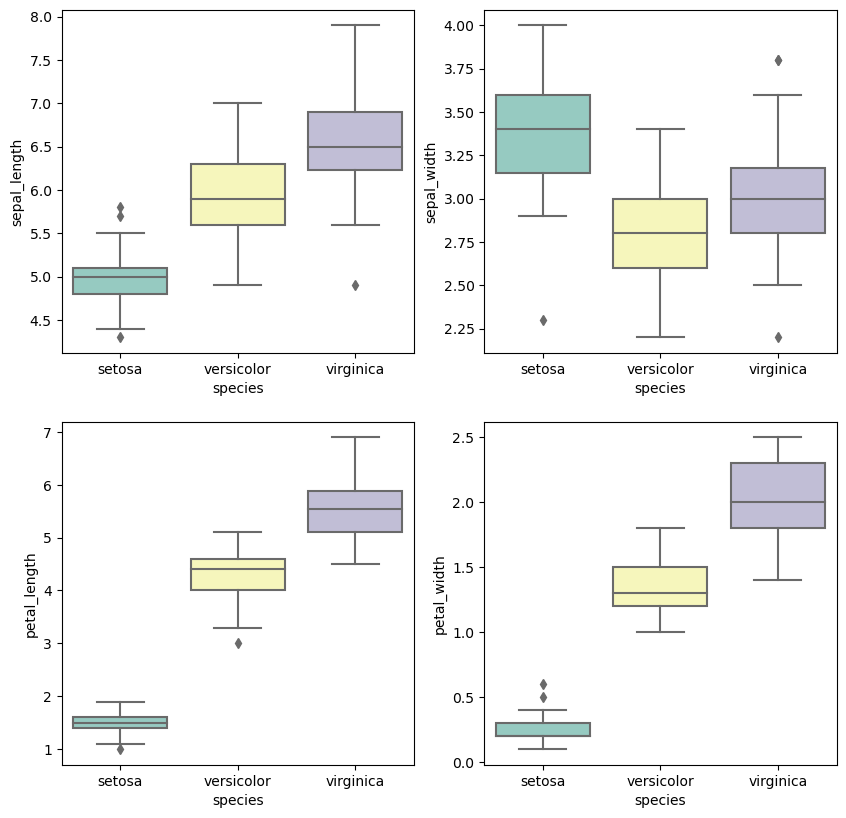

In [24]:
x = 1
plt.figure(figsize=(10,10),dpi=100)

for i in df.columns:
    if df[i].dtypes !='object':
        plt.subplot(2,2,x)
        sns.boxplot(data=df,x='species',y=i,palette='Set3')
        
        x+=1